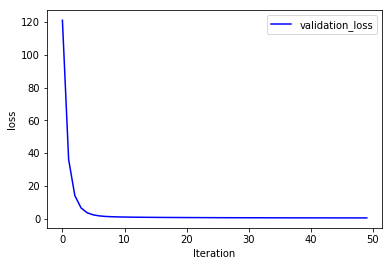

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#读取数据
def get_data():
    header = ['user_id', 'item_id', 'rating', 'timestamp']
    df = pd.read_csv('ml-100k/u.data',sep='\t',names=header,encoding='latin-1')
    return df
#分割数据
data = get_data()
n_users = data.user_id.unique().shape[0]
n_items = data.item_id.unique().shape[0]
#print(n_users)
#print(n_items)
train_data,test_data=train_test_split(data,test_size=0.25)
train_data= pd.DataFrame(train_data)
test_data= pd.DataFrame(test_data)
#全零初始化
train_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_matrix[line[1]-1, line[2]-1] = line[3]

test_matrix = np.zeros((n_users,n_items))
for line in test_data.itertuples():
    test_matrix[line[1]-1, line[2]-1] = line[3]
#print(train_matrix)
def train_and_test():
    k = 150
    penalty_factor = 0.01
    learning_rate = 0.0001
    epochs = 50

    users = np.shape(train_matrix)[0]
    items = np.shape(train_matrix)[1]
    P = np.random.rand(users,k)
    Q = np.random.rand(k,items)
    validation_loss = []

    for step in range(epochs):
        # 训练P矩阵和Q矩阵
        for u in range(users):
            for i in range(items):
                if train_matrix[u][i] > 0:
                    error = train_matrix[u][i] - np.dot(P[u], Q[:, i])
                    P[u] += 2 * learning_rate * error * Q[:, i] - 2 * penalty_factor * P[u]
                    Q[:, i] += 2 * learning_rate * error * P[u] - 2 * penalty_factor * Q[:, i]
        loss = np.sum(np.power(test_matrix - np.dot(P, Q), 2)) / (users * items) + penalty_factor * (
        np.sum(np.power(P, 2)) + np.sum(np.power(Q, 2))) / k
        validation_loss.append(loss)

    return validation_loss

loss = train_and_test()
#画出loss曲线图
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.plot(loss, label="validation_loss",color="blue",linewidth=1.5)
plt.legend(loc='upper right')
plt.show()